# Beefed-up clf version2 RF 


interestingly it picked amna for the top 2 photos and some of the other choices are bit more sensible but still can't be too sure on RF probabilities, deosn't provide the precision needed


In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')


In [3]:
!ls *.pickle

knn_tinderlikes3.pickle  lr_tinderlikes2.pickle   rf_tinderlikes2.pickle
knn_tinderlikes4.pickle  lr_tinderlikes3.pickle   rf_tinderlikes3.pickle
lr_tinderlikes.pickle    rf_cv_tinderlikes.pickle


In [4]:
lr = pickle.load(open('knn_tinderlikes3.pickle','rb'))
lr

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

count    49.000000
mean      0.530612
std       0.338011
min       0.000000
25%       0.200000
50%       0.600000
75%       0.800000
max       1.000000
dtype: float64
skew --  -0.018556920154083327
kurtosis -- -1.3385039246625046


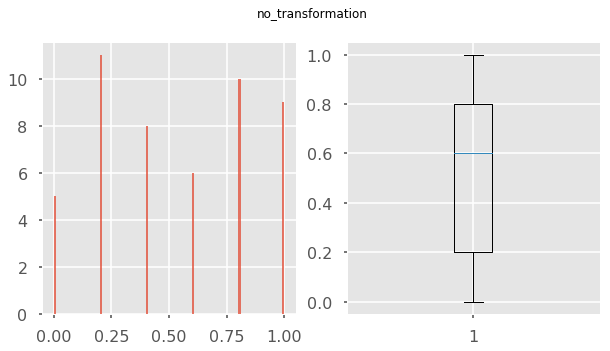

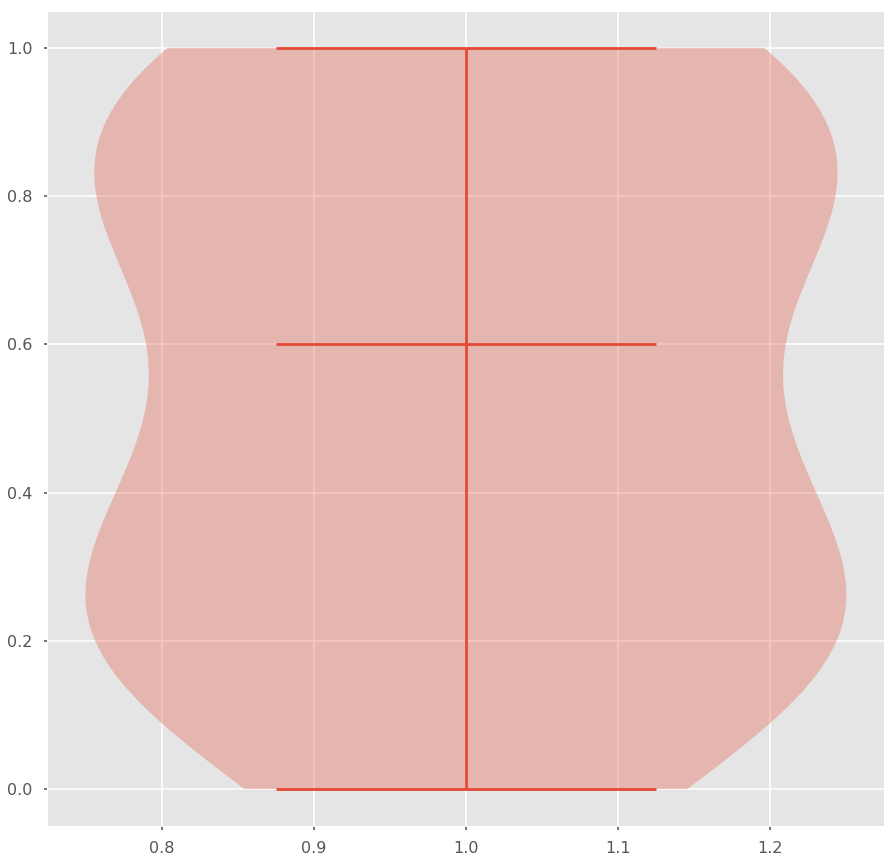

In [5]:

probas = pd.Series(lr.predict_proba(encodings)[:,1])
plot_distribution(probas)

In [6]:
num_of_bins = 5
sorted_imgs = sorted(zip(probas, arrays_rescaled), key=lambda x: x[0], reverse=True)
sorted_arrays_rescaled  = [img[1] for img in sorted_imgs]
sorted_probas = [img[0] for img in sorted_imgs]

bin_bounds = list(map(lambda x: x/100, list(range(0,100, int(100/num_of_bins)))))
bin_labels = pd.cut(sorted_probas, bins=bin_bounds, labels=list(range(1, num_of_bins )))


1
11


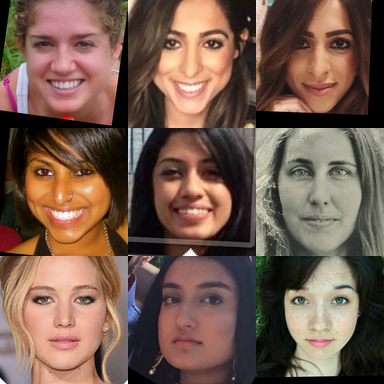

2
8


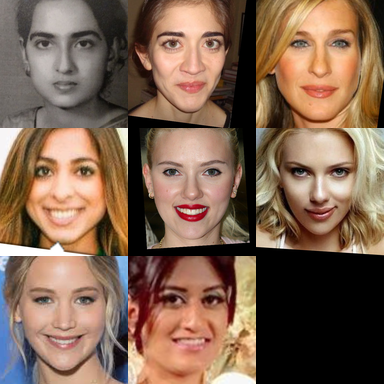

3
6


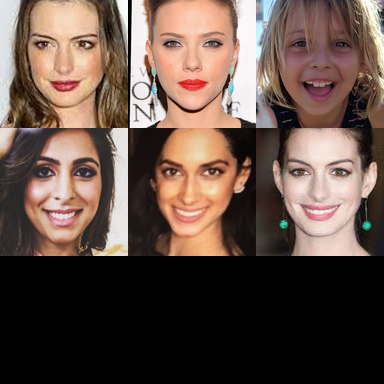

4
10


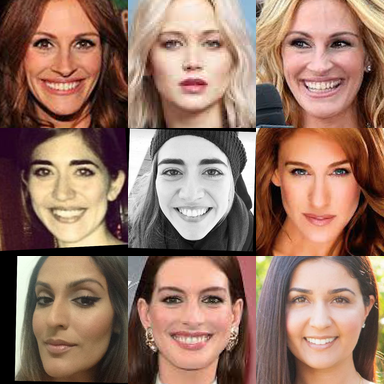

In [7]:
from image_helpers import _square_sizer

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=(3,3)
    ))
    


1
11


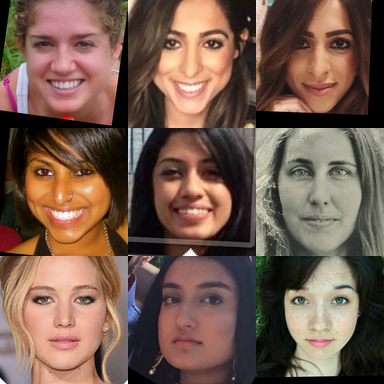

2
8


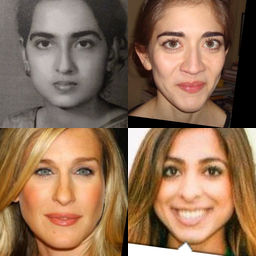

3
6


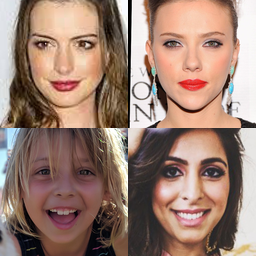

4
10


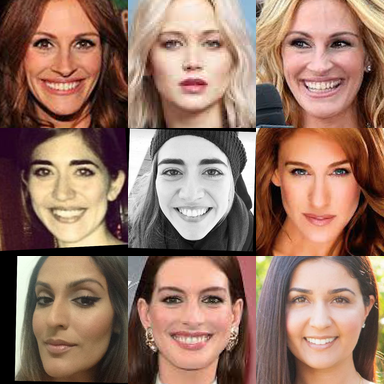

In [8]:

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=_square_sizer(len(args))
    ))
    


# Individual rankings
scarlett johansen photo which scored very highly (but the rest of her photos tanked) One of amna also scored very highly but the other one was mundane.


The b/w photos seemed to have ranked much lower... try including only colored photos of people


1.0


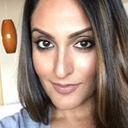

1.0


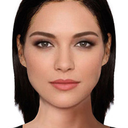

1.0


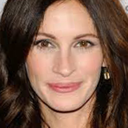

1.0


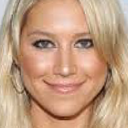

1.0


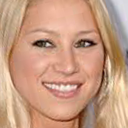

1.0


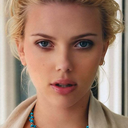

1.0


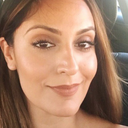

1.0


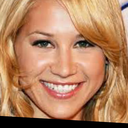

1.0


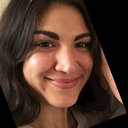

0.8


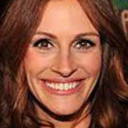

0.8


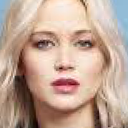

0.8


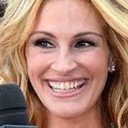

0.8


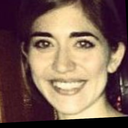

0.8


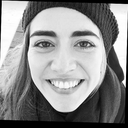

0.8


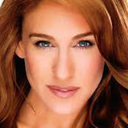

0.8


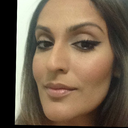

0.8


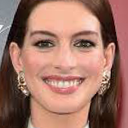

0.8


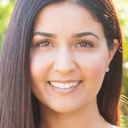

0.8


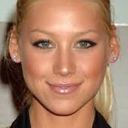

0.6


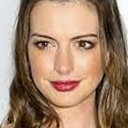

0.6


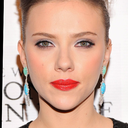

0.6


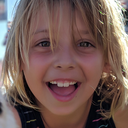

0.6


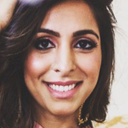

0.6


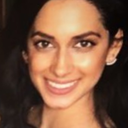

0.6


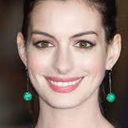

0.4


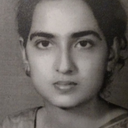

0.4


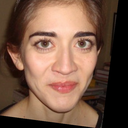

0.4


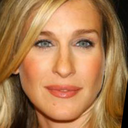

0.4


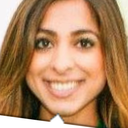

0.4


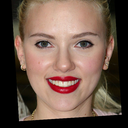

0.4


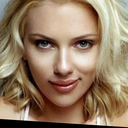

0.4


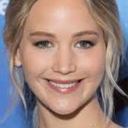

0.4


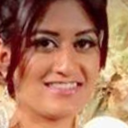

0.2


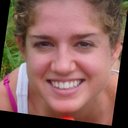

0.2


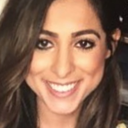

0.2


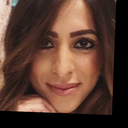

0.2


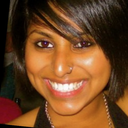

0.2


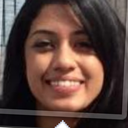

0.2


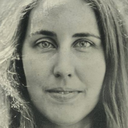

0.2


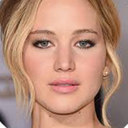

0.2


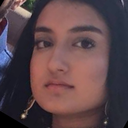

0.2


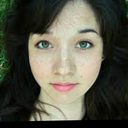

0.2


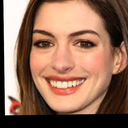

0.2


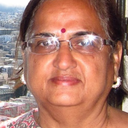

0.0


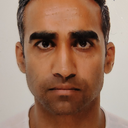

0.0


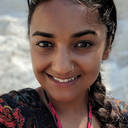

0.0


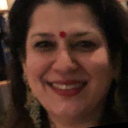

0.0


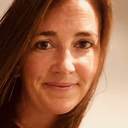

0.0


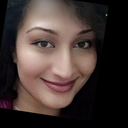

In [9]:
for idx in range(len(sorted_arrays_rescaled)):
    print(sorted_probas[idx])
    display(sorted_arrays_rescaled[idx])
    